# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [10]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import optuna

from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline
plt.style.use('dark_background')
optuna.logging.set_verbosity(optuna.logging.WARNING)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Прочитаем исходные данные:

In [11]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

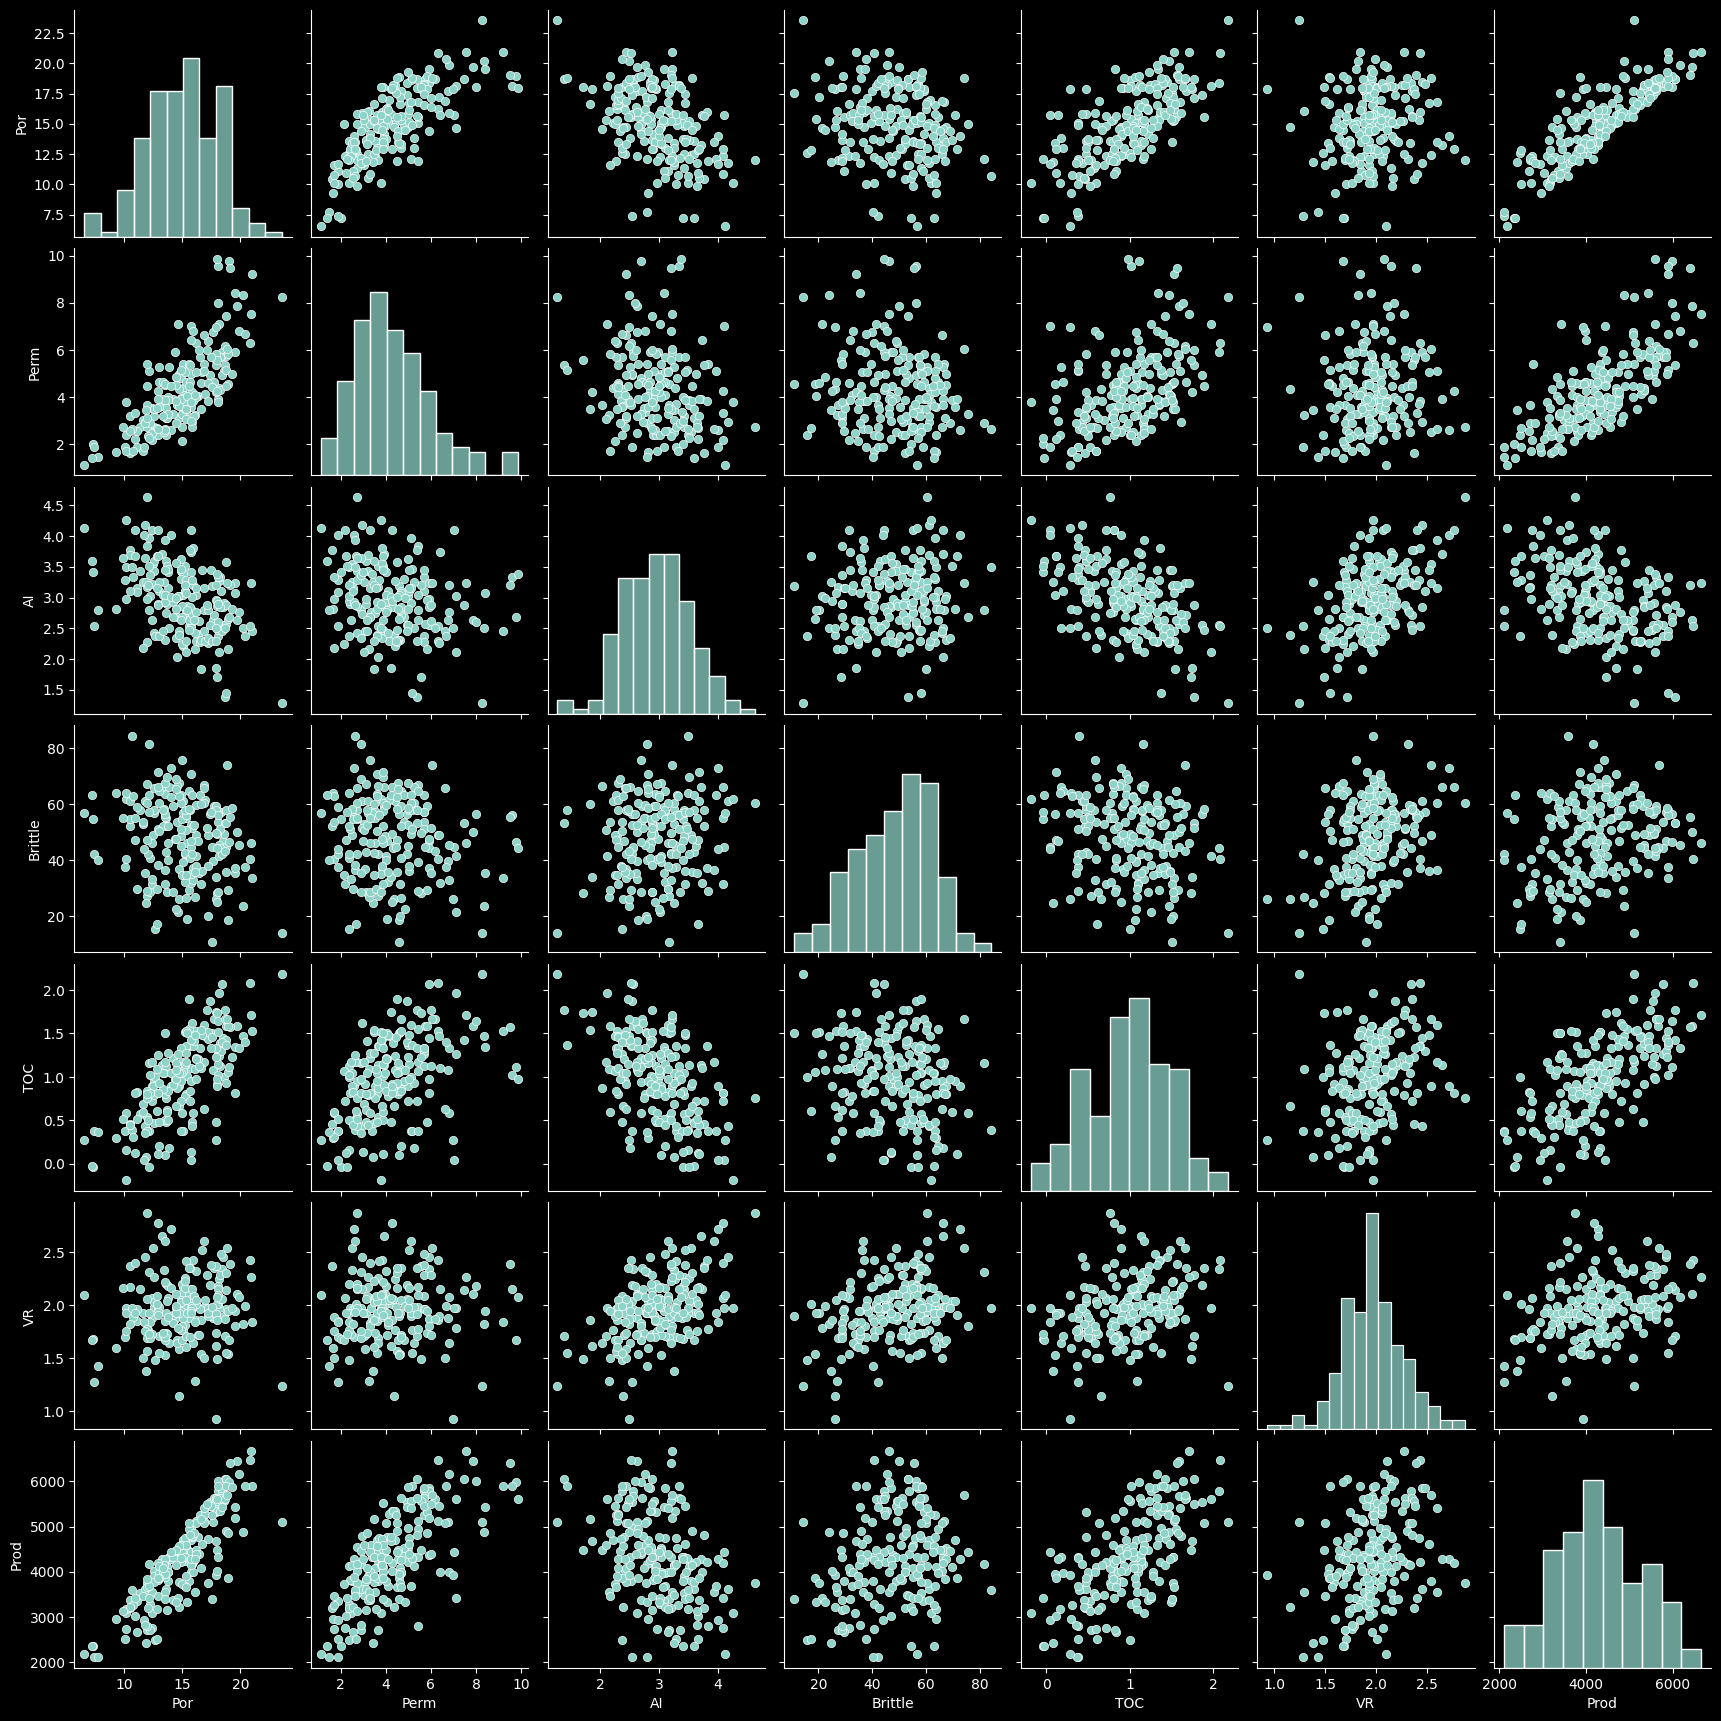

In [12]:
# Ваш код здесь
# не будем визуализировать признак идентификатора скважин
sns.pairplot(data.drop(columns=['Well']));

### Вывод

Можно выделить 3 признака, которые имеют высокий показатель корреляции с целевым Prod:

* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* TOC — общий органический углерод (%);

У всех признаков(исключая Well, который является просто идентификатором) распределение близко к распределению Гаусса или логнормальному.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

Определитель матрицы корреляции: 0.00073
Ранг матрицы корреляции: 8
Количество векторов в матрице: 8


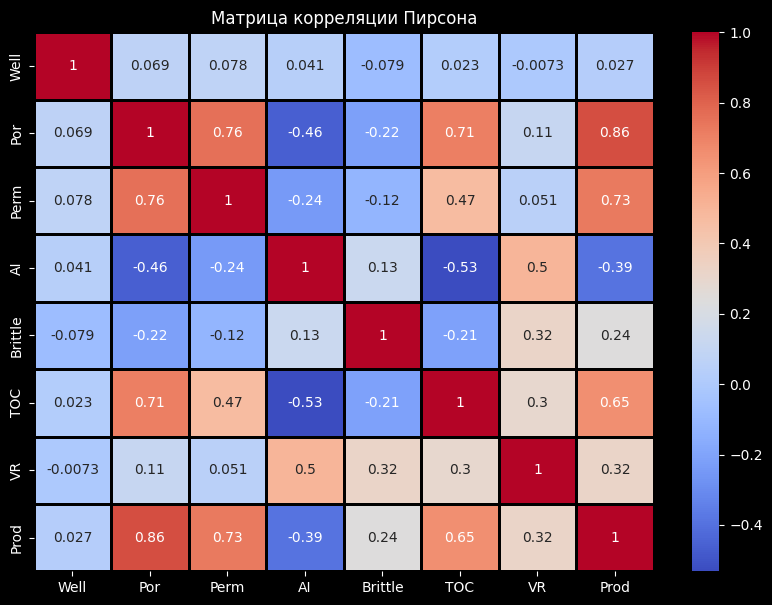

In [13]:
# Ваш код здесь

def show_corr_matrix(data:pd.DataFrame):
    
    """Shows Pearson matrix of correlation for `DataFrame`

    Args:
        data (`pd.DataFrame`): DataFrame
        
    Returns:
        corr_matrix (`pd.DataFrame`): Pearson matrix of correlation for `DataFrame`
    """
    
    data_copy = data.copy()
    for factor in data_copy.columns:
        # центрирование вектора
        centered_vec = data_copy.loc[:, factor] - data_copy.loc[:, factor].mean()
        # стандартизация вектора
        data_copy[factor] = centered_vec / np.linalg.norm(centered_vec)
        
    corr_matrix = data_copy.T @ data_copy
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title('Матрица корреляции Пирсона')
    sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax, annot=True, linewidths=1, linecolor='black');
    determinant = np.linalg.det(corr_matrix).round(5)
    rank = np.linalg.matrix_rank(corr_matrix)
    print(
        'Определитель матрицы корреляции: ', determinant,
        '\nРанг матрицы корреляции: ', rank, 
        '\nКоличество векторов в матрице: ', corr_matrix.shape[0], sep=''
    )
    return corr_matrix

corr_matrix = show_corr_matrix(data)

### Вывод

С целевой переменной Prod сильнее всего коррелируют следующие факторы:
* Por;
* Perm;
* TOC.

Ранг матрицы равен количеству векторов в системе, значит чистой коллинеарности нет.
Определитель матрицы близок к нулю, значит есть мультиколлинеарность факторов, где формально выразить один фактор через другой не получится, но значение корреляции довольно высоко. Это следующие факторы:

* Perm и Por;
* TOC и Por;

Матрица корреляции вырождена. Из-за мультиколлинеарности коэффициенты линейной регрессии по МНК могут быть неточными. Стоит избавиться от мультиколлинеарности, чтобы можно было воспользоваться формулой МНК.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [14]:
# Ваш код здесь

def ols(X:pd.DataFrame, y:pd.Series):
    
    """Return OLS coeffs for data X

    Args:
        X (`pd.DataFrame`): data
        y (`pd.Series`): vector of correct answers

    Returns:
        tuple: (coeffs (`np.array`), coeffs_df (`pd.DataFrame`))
    """
    
    columns = X.columns
    X = np.array(X)
    coeffs = np.linalg.inv(X.T @ X) @ X.T @ y
    coeffs_df = pd.DataFrame(
        data=coeffs,
        index=columns,
        columns=['coeff']
    ).T
    return coeffs, coeffs_df

# Добавим вектор-столбец из единиц(intercept) в матрицу наблюдений X
X = pd.DataFrame(
    np.column_stack([
        np.ones(data.shape[0]),
        data.drop(columns='Prod')
    ]),
    columns=['intercept'] + data.drop(columns='Prod').columns.tolist()
)
y = data['Prod']
coeffs, coeffs_df = ols(X, y)
display(coeffs_df.round())

,intercept,Well,Por,Perm,AI,Brittle,TOC,VR
coeff,-1232.0,0.0,230.0,116.0,-365.0,25.0,-78.0,785.0


### Вывод
* Есть признак, который никак не влияет на целевую переменную - Well. Он является просто идентификатором скважин(без повторений) и является неинформативным.
* Интерпретация полученных коэффициентов:
* * Каждый процент пористости скважины Por увеличивает целевую переменную на 230 единиц;
* * Каждая единица акустического импеданса Al ($кг/м^{2} * 10^{6}$) уменьшает целевую переменную на 365 единиц;
* * Каждый процент коэффициента отражения витринита VR увеличивает целевую переменную на 785 единиц.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [15]:
# Ваш код здесь
def print_metrics(y:pd.Series, y_pred:pd.Series):
    
    """Prints MAE and MAPE for `y` and `y_pred`

    Args:
        y (pd.Series): vector of correct answers
        y_pred (pd.Series): vector of predicted responses

    """
    
    y, y_pred = np.array(y), np.array(y_pred)
    mae = (np.mean(np.abs(y - y_pred))).round(3)
    mape = (np.mean(np.abs((y - y_pred) / y)) * 100).round(3)
    units = '(млн. кубических футов)'
    print(f'MAE: {mae} {units}')
    print(f'MAPE: {mape} %')

# одна новая скважина
new_well = pd.DataFrame({
    'ones': 1,
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}, index=[0])
new_well_prod = 4748.315024
# предсказанный целевой фактор для одной скважины
new_well_prod_hat = new_well.values @ coeffs
# абсолютная ошибка для одной скважины
new_well_error = np.abs(new_well_prod - new_well_prod_hat).round(3)[0]
# предсказанный целевой фактор для всего датасета
y_hat = X @ coeffs
print(f'Абсолютная ошибка для одной новой скважины: {new_well_error} (млн. кубических футов) \n')
print_metrics(y, y_hat)

Абсолютная ошибка для одной новой скважины: 25.251 (млн. кубических футов) 

MAE: 153.623 (млн. кубических футов)
MAPE: 3.628 %


### Вывод

* В среднем модель ошибается на 153 млн. кубических футов ($MAE$). Для человека, который не разбирается в этой теме, будет сложно понять - много это или мало.
* Если переводить $MAE$ в $MAPE$, то модель в среднем ошибается на 3.6%. Этот показатель будет более понятен в данном случае.
* Без тестового набора данных невозможно сказать - успешная модель или нет, т.к. эти метрики рассчитаны на тех же самых данных, на которых модель и обучалась.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

,intercept,Well,Por,Perm,AI,Brittle,TOC,VR
coeff,-1232.0,0.0,230.0,116.0,-365.0,25.0,-78.0,785.0


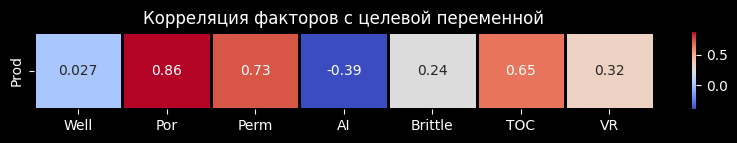

In [16]:
# Ваш код здесь

# сравним знаки полученных коэффициентов со знаками в матрице корреляций
corr_matrix_prod = corr_matrix[-1:][X.columns.delete(0)]
fig, ax = plt.subplots(figsize=(10, 1))
ax.set_title('Корреляция факторов с целевой переменной')
sns.heatmap(corr_matrix_prod, cmap='coolwarm', ax=ax, annot=True, linewidths=1, linecolor='black');
display(coeffs_df.round())

### Вывод

* Можно заметить, что у признака TOC отрицательный коэффициент(обратная пропорциональность), а корреляция говорит о том, что зависимость прямая.
* Вероятнее всего, дело в мультиколлинеарности, т.к. фактор Por имеет высокую корреляцию с факторами Perm и TOC. О мультиколлинеарности нам говорил и ранее посчитанный определитель матрицы корреляции - он очень близок к нулю и измеряется в десятитысячных долях.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

MAE: 171.431 (млн. кубических футов)
MAPE: 4.044 %


,intercept,Por,AI,Brittle,VR
coeff,-1835.0,293.0,-200.0,28.0,517.0


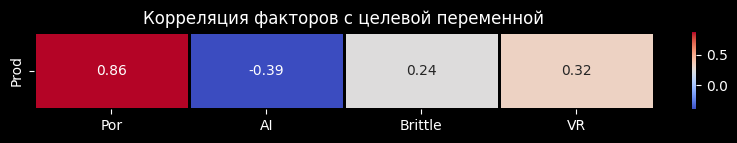

In [17]:
# Ваш код здесь

# удаляем сильно скореллированные факторы (>0.7)
drop_cols = ['TOC','Perm', 'Well']
X.drop(columns=drop_cols, inplace=True)
# считаем коэффициенты на обновленной матрице наблюдений без коррелирующих факторов
coeffs_cleaned, coeffs_df_cleaned = ols(X, y)
y_hat_cleaned = X.values @ coeffs_cleaned
# сравним знаки между полученными коэффициентами и матрицей корреляции
corr_matrix_prod = corr_matrix[-1:][X.columns.delete(0)]
fig, ax = plt.subplots(figsize=(10, 1))
ax.set_title('Корреляция факторов с целевой переменной')
sns.heatmap(corr_matrix_prod, cmap='coolwarm', ax=ax, annot=True, linewidths=1, linecolor='black');
print_metrics(y, y_hat_cleaned)
display(coeffs_df_cleaned.round())

### Вывод

* Теперь каждая единица фактора Por увеличивает целевую перменную на 293 (до удаления скореллированных и неинформативных факторов значение было 230).
* Каждая единица фактора Al уменьшает целевую перменную на 200 (до удаления было 365).
* Метрики немного ухудшились по сравнению с предыдущей моделью на полном наборе данных. Это связано с тем, что мы избавились от мультиколлинеарности, но при этом потеряли часть данных:
  * $MAE$ увеличился с 153 до 171
  * $MAPE$ увеличился на 0.4%.
* Благодаря борьбе с мультиколлинеарностью получилось побороть противоречие коэффициентов. Знаки коэффициентов соответствуют знакам в матрице корреляций.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [18]:
# так как мы уже добавили вектор-столбец из единиц, то нет смысла добавлять ещё один такой же
lr_ols_model = LinearRegression(fit_intercept=False)
lr_ols_model.fit(X, y)
y_pred = lr_ols_model.predict(X)
print('Коэффициенты модели линейной регрессии из sklearn:\n', lr_ols_model.coef_.round(), '\n', sep='')
print_metrics(y, y_pred)

Коэффициенты модели линейной регрессии из sklearn:
[-1835.   293.  -200.    28.   517.]

MAE: 171.431 (млн. кубических футов)
MAPE: 4.044 %


### Вывод

* Результаты модели из sklearn полностью совпали с решением с помощью numpy, а это значит, что использовался один и тот же алгоритм.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [1]:
# импортируем библиотеки
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [25]:
# Ваш код здесь

# стандартизируем матрицу наблюдений X
s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(X)
# создаем полиномиальные признаки в матрице X (стандартизированной)
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
print('Количество факторов после генерации полиномиальных признаков 3-ей степени:', X_poly.shape[1])
# обучаем модель на полиномиальных факторах с помощью кросс-валидации
lr_ols_model = LinearRegression()
cv = cross_validate(
    lr_ols_model,
    X=X_poly,
    y=y,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    return_train_score=True,
    n_jobs=-1
)
# считаем метрики
train_score = (np.mean(np.abs(cv['train_score'])) * 100).round(2)
test_score = (np.mean(np.abs(cv['test_score'])) * 100).round(2)
print(
    f'Train MAPE: {train_score} %',
    f'Test MAPE: {test_score} %', sep='\n'
)

Количество факторов после генерации полиномиальных признаков 3-ей степени: 55
Train MAPE: 6.52 %
Test MAPE: 7.7 %


### Вывод

* На тренировочных фолдах $MAPE = 6.3$%, а на тестовых $MAPE = 7.4$%. Переобучение не наблюдается, но некоторые из полиномиальных факторов могут коррелировать с другими сгенерированными факторами(иметь линейную зависимость), поэтому вектор коэффициентов может иметь нестабильные значения.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [26]:
# Ваш код здесь

def find_hyperparameters(regression_model):
    # поиск гиперпараметров с помощью optuna
    def optuna_optimize(trial):
        
        params = dict(alpha=trial.suggest_float('alpha', 1e-2, 20))
        if regression_model is ElasticNet:      
            params['l1_ratio'] = trial.suggest_float('l1_ratio', 1e-2, 1)
        model = regression_model(**params).fit(X_poly, y)
        y_pred = model.predict(X_poly)
        # MAPE
        score = metrics.mean_absolute_percentage_error(y, y_pred)
        return score 
    
    # объект исследования
    study = optuna.create_study(study_name='LinearRegression', direction='minimize')
    study.optimize(optuna_optimize, n_trials=100)

    print(
        f'Модель: {regression_model.__name__} \n',
        f"Наилучшие значения гиперпараметров: {study.best_params}\n",
        f"Наилучший MAPE на обучающем наборе во время подбора гиперпараметров: {round(study.best_value * 100, 2)} %", sep=''
    )
    # создаем модель с подобранными гиперпараметрами и считаем метрики на кросс-валидации
    model = regression_model(**study.best_params)
    cv = cross_validate(
        estimator=model,
        X=X_poly,
        y=y,
        scoring='neg_mean_absolute_percentage_error',
        cv=5,
        return_train_score=True,
        n_jobs=-1
    )
    # считаем метрики
    train_score = (np.mean(np.abs(cv['train_score'])) * 100).round(2)
    test_score = (np.mean(np.abs(cv['test_score'])) * 100).round(2)
    print(
        f'Train MAPE: {train_score} %',
        f'Test MAPE: {test_score} %', sep='\n'
    )

# ищем значение alpha для модели Lasso, выводим метрики MAPE на фолдах
find_hyperparameters(Lasso)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.879e+04, tolerance: 1.958e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.201e+04, tolerance: 1.958e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Модель: Lasso 
Наилучшие значения гиперпараметров: {'alpha': 1.8789648297437336}
Наилучший MAPE на обучающем наборе во время подбора гиперпараметров: 1.82 %
Train MAPE: 1.79 %
Test MAPE: 2.4 %


### Выводы

Благодаря $L_{1}$ -регуляризации получилось существенно улучшить метрику $MAPE$ как на валидационном, так и на тренировочном наборе данных.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [27]:
# Ваш код здесь
# ищем значение alpha для модели Ridge, выводим метрики MAPE на фолдах
find_hyperparameters(Ridge)

Модель: Ridge 
Наилучшие значения гиперпараметров: {'alpha': 0.07958983353717822}
Наилучший MAPE на обучающем наборе во время подбора гиперпараметров: 1.85 %
Train MAPE: 1.77 %
Test MAPE: 2.67 %


Выводы
$L_{2}$-регуляризация показала практически тот же самый результат, что и Lasso, но на валидационном наборе всё же процент ошибки немного выше (на приблезительно $0.2$)

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [28]:
# Ваш код здесь
# ищем значение alpha и l1_ratio для модели ElasticNet, выводим метрики MAPE на фолдах
find_hyperparameters(ElasticNet)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.911e+05, tolerance: 1.958e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.804e+04, tolerance: 1.958e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Модель: ElasticNet 
Наилучшие значения гиперпараметров: {'alpha': 1.4314173939366044, 'l1_ratio': 0.9999775999991787}
Наилучший MAPE на обучающем наборе во время подбора гиперпараметров: 1.82 %
Train MAPE: 1.78 %
Test MAPE: 2.44 %


### Вывод

ElasticNet на валидационном наборе данных показал результат немного хуже, чем Lasso и Ridge.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [30]:
# Ваш код здесь

results = pd.DataFrame([
    ['LinearRegression', '', False, 4, 4],
    ['LinearRegression', '', True, 6.29, 7.39],
    ['Lasso', 'alpha: '+str(round(1.8785587079221395, 3)), True, 1.79, 2.4],
    ['Ridge', 'alpha: '+str(round(0.07711366956486679, 3)), True, 1.77, 2.67],
    ['ElasticNet', 'alpha: '+str(round(0.010651282774836499, 3))+', l1_ratio: '+str(round(0.23833559374604474, 3)), True, 1.85, 2.75],   
],
columns=['Model', 'Hyperparameters', 'PolynomialFeatures', 'MAPE Train, %', 'Mape Test, %']
)
results.style.background_gradient('Reds', subset='Mape Test, %')

,Model,Hyperparameters,PolynomialFeatures,"MAPE Train, %","Mape Test, %"
0,LinearRegression,,False,4.000000,4.000000
1,LinearRegression,,True,6.290000,7.390000
2,Lasso,alpha: 1.879,True,1.790000,2.400000
3,Ridge,alpha: 0.077,True,1.770000,2.670000
4,ElasticNet,"alpha: 0.011, l1_ratio: 0.238",True,1.850000,2.750000


### Вывод

* Самый худший результат(на валидационных фолдах) показала модель МНК с полиномиальными факторами и без регуляризации: $7.39$%
* Наилучший результат (на валидационных фолдах) показала модель МНК с $L_{1}$-регуляризацией: $2.4$% 
Модели Ridge и ElasticNet лишь немного хуже по целевой метрике относительно Lasso.
* Ни одна из моделей не переобучилась, у всех из представленных(даже у той, что без регуляризации) метрика на валидационных фолдах лишь немного хуже (не более $1$%), чем на тренировочных.